In [1]:
import psi4
import matplotlib.pyplot as plt
import numpy as np

psi4.set_memory(int(4e9))
psi4.set_num_threads(6)
psi4.core.clean()

import n2v

In [4]:
Full_Molec = psi4.geometry("""
nocom
noreorient
C 

H 1 1.082 

C 1 1.387 2 120.0 

H 3 1.082 1 120.0 2 0.0 

C 3 1.387 1 120.0 4 180.0 

H 5 1.082 3 120.0 4 0.0 

C 5 1.387 3 120.0 6 180.0 

H 7 1.082 5 120.0 6 0.0 

C 7 1.387 5 120.0 8 180.0 

H 9 1.082 7 120.0 8 0.0 

C 9 1.387 7 120.0 10 180.0 

H 11 1.082 9 120.0 10 0.0 
units bohr
symmetry c1
""")

In [ ]:
psi4.set_options({"reference" : "rhf",
                  "opdm": True,
                  "tpdm": True,
                  'DFT_SPHERICAL_POINTS': 350,  # Usually specify the DFT spherical grid is highly recommended.
                  'DFT_RADIAL_POINTS': 35,  # See [https://psicode.org/psi4manual/master/dft.html] for options.
                  "SAVE_JK": True
                 })  # Spin-Restricted

# IMPORTANT NOTE: ONLY psi4.CIWavefunction or RHF is supported.
wfn = psi4.properties("detci/cc-pcvdz", return_wfn=True, molecule=Full_Molec, properties=["dipole"])[1]

inverter = n2v.Inverter(wfn)

In [39]:
x = np.linspace(-10,10,2001)
y = [0]
z = [0]
grid, shape = inverter.generate_grids(x,y,z)
grid.shape

(3, 2001)

In [50]:
inverter.invert("mRKS", opt_max_iter=30, frac_old=0.8, sing=(1e-9, 1e-7, 1e-9, 1e-7))

The guide potential is changed to v_hartree.
Memory taken by ERI integral matrix and 2pdm is about: 1.033 GB.
Iter: 1, Density Change: 5.47e-04, Eigenvalue Change: 5.60e+00, Potential Change: 8.25e-02.
Iter: 2, Density Change: 2.84e-05, Eigenvalue Change: 2.83e-02, Potential Change: 1.97e-03.
Iter: 3, Density Change: 3.42e-06, Eigenvalue Change: 4.16e-03, Potential Change: 1.83e-03.
Iter: 4, Density Change: 2.41e-06, Eigenvalue Change: 4.11e-03, Potential Change: 1.79e-03.
Iter: 5, Density Change: 2.21e-06, Eigenvalue Change: 4.07e-03, Potential Change: 1.78e-03.
Iter: 6, Density Change: 2.18e-06, Eigenvalue Change: 4.03e-03, Potential Change: 1.78e-03.
Iter: 7, Density Change: 2.15e-06, Eigenvalue Change: 3.99e-03, Potential Change: 1.78e-03.
Iter: 8, Density Change: 2.10e-06, Eigenvalue Change: 3.96e-03, Potential Change: 1.78e-03.
Iter: 9, Density Change: 2.04e-06, Eigenvalue Change: 3.93e-03, Potential Change: 1.78e-03.
Iter: 10, Density Change: 1.99e-06, Eigenvalue Change: 3.90e-0

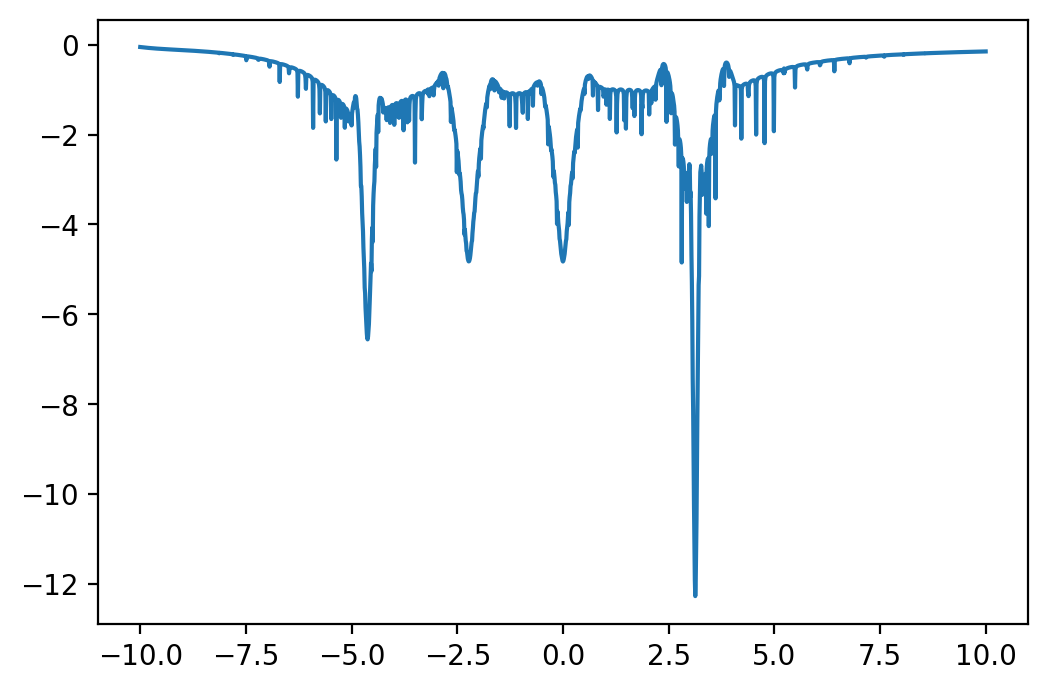

In [44]:
fig, axes = plt.subplots(dpi=200)
axes.plot(x, inverter.grid.vxc, label="vxc")

In [51]:
x,y,z,_ = inverter.Vpot.get_np_xyzw()

mask = np.bitwise_and(np.isclose(y, 0), np.isclose(z,0))
order = np.argsort(x[mask])

x_plot = x[mask][order]
vxc_plot = inverter.grid.vxc[mask][order]
np.min(vxc_plot)

-12.17108447576365

(-10, 10)

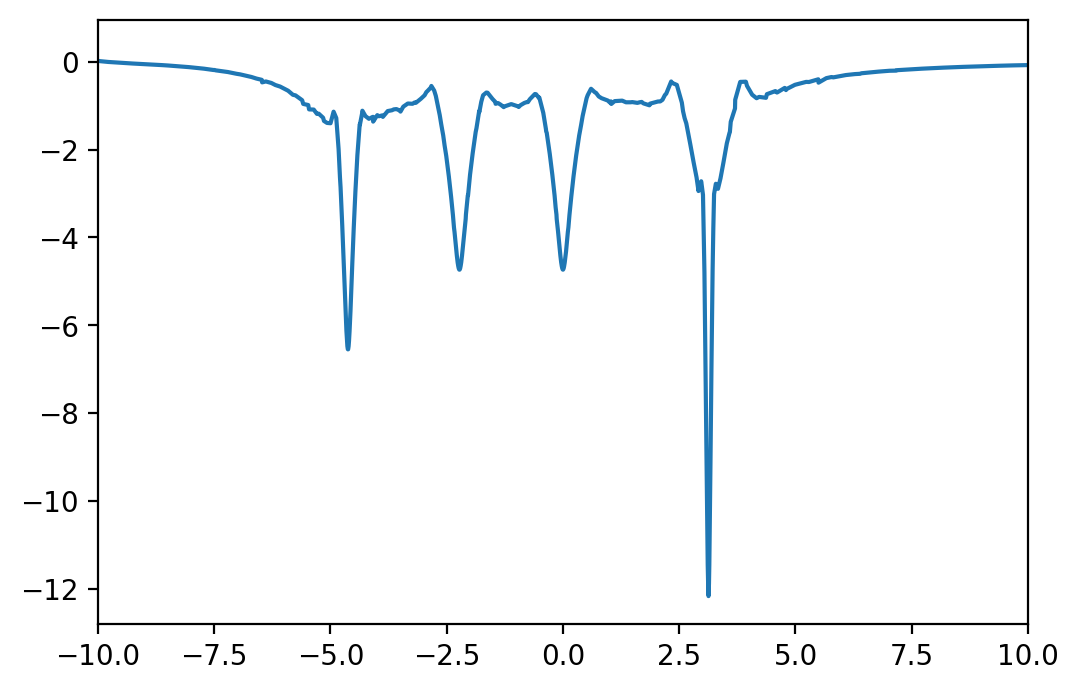

In [52]:
fig, axes = plt.subplots(dpi=200)
axes.plot(x_plot, vxc_plot, label="vxc")
axes.set_xlim(-10, 10)

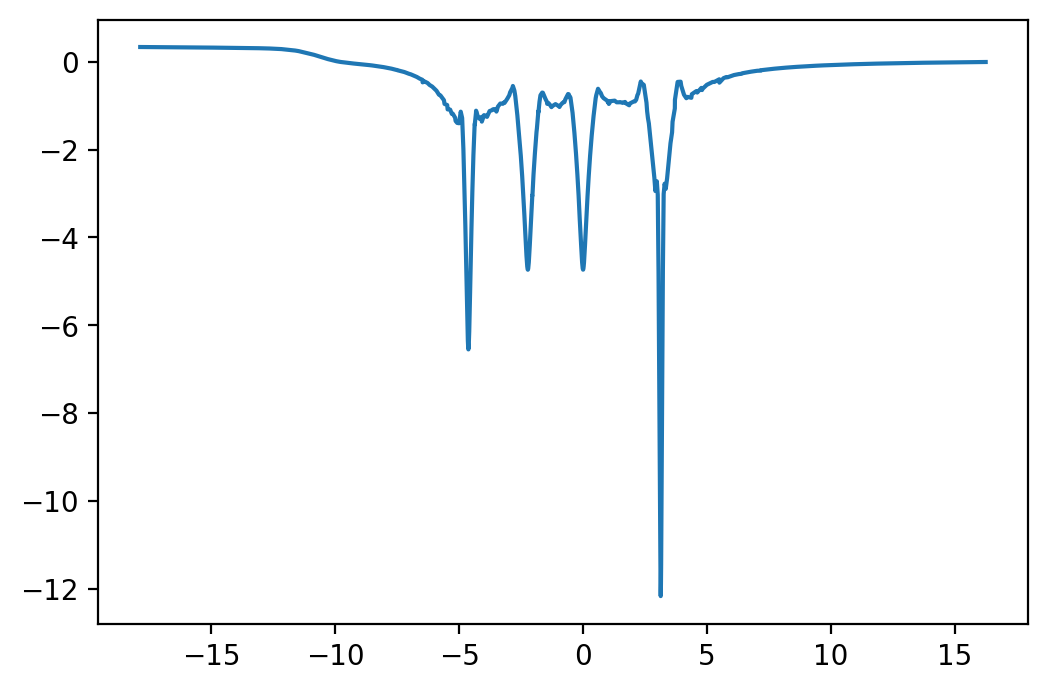

In [6]:
fig, axes = plt.subplots(dpi=200)
axes.plot(x_plot, vxc_plot, label="vxc")

In [7]:
import pickle

In [8]:
Data = {}
Data["grid"] = np.array((x, y, z))
Data["vxc"] = inverter.grid.vxc

In [9]:
with open("FC2Cl_mRKS1.pkl", "wb") as handle:
    pickle.dump(Data, handle)